In [14]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt 
import numpy as np
import random

In [15]:
X,y = make_classification(n_samples=100, n_features=5, random_state=40, class_sep=2) 

In [16]:
print(X[64] , y[64])


[ 3.77464443  2.00609864  4.04324844 -1.13166364  0.24385503] 1


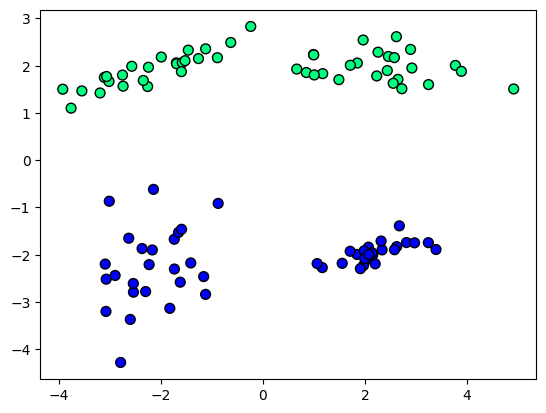

In [17]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter', edgecolor='k', s=50)

In [18]:
w = np.ones((X.shape[1],1))
w.shape

(5, 1)

In [19]:
def step(z):
    return 1 if z > 0 else 0

def perceptron(X, y, epochs=1000, learn_rate=0.01):
    X = np.hstack([np.ones((X.shape[0], 1)), X])  
    m, n = X.shape
    w = np.ones((n, 1))
    y = y.reshape(-1, 1)

    for i in range(epochs):
        rand_x = random.randint(0, m - 1)
        x_i = X[rand_x].reshape(1, -1)     
        y_hat = step(np.dot(x_i, w))      
        error = y[rand_x][0] - y_hat       

        w += learn_rate * error * x_i.T

    return w[0],w[1:]



In [20]:
intercept_,coef_ = perceptron(X,y)

In [21]:
print(coef_)
print(intercept_)

[[0.46210222]
 [1.4020215 ]
 [0.61559172]
 [1.31948917]
 [0.87803106]]
[0.84]


In [22]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [23]:
print(m)
print(b)

[-0.3295971]
[-0.59913489]


(-3.0, 2.0)

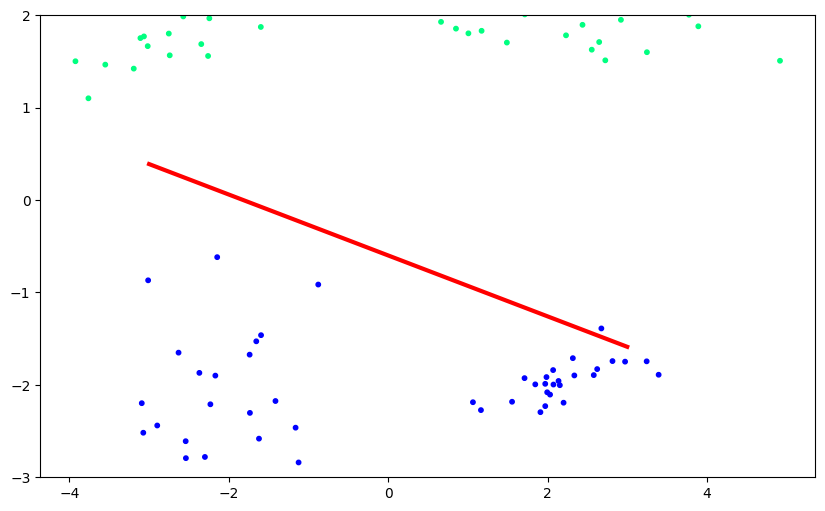

In [24]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=10)
plt.ylim(-3,2)

In [25]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression()
lor.fit(X,y)

LogisticRegression()

(-3.0, 2.0)

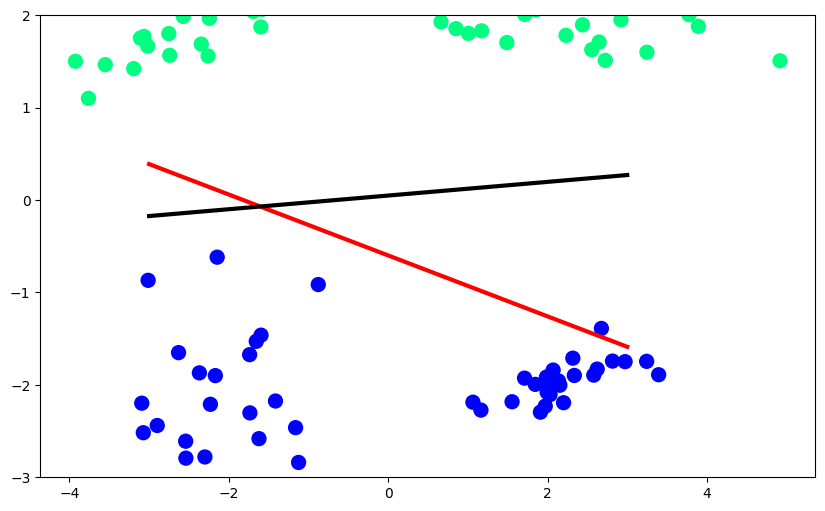

In [26]:
m = -(lor.coef_[0][0]/lor.coef_[0][1])
b = -(lor.intercept_/lor.coef_[0][1])
x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_input + b
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)